In [1]:
#GETTING THE DATA
import pandas as pd
df = pd.read_csv("C:/Users/saiab/Downloads/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#CLEANING THE DATA
#i)remove which is unnecessary columns
df1 = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'], axis='columns')
df1

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [3]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df1['sex_n'] = LE.fit_transform(df1['Sex'])


In [4]:
df1

,Survived,Pclass,Sex,Age,Fare,sex_n
0,0,3,male,22.0,7.2500,1
1,1,1,female,38.0,71.2833,0
2,1,3,female,26.0,7.9250,0
3,1,1,female,35.0,53.1000,0
4,0,3,male,35.0,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,1
887,1,1,female,19.0,30.0000,0
888,0,3,female,NaN,23.4500,0
889,1,1,male,26.0,30.0000,1


In [5]:
df2 = df1.drop(['Sex'] , axis='columns')
df2

,Survived,Pclass,Age,Fare,sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,NaN,23.4500,0
889,1,1,26.0,30.0000,1


In [6]:

df3 = df2.dropna(subset=['Age'])
df3

,Survived,Pclass,Age,Fare,sex_n
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
885,0,3,39.0,29.1250,0
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
889,1,1,26.0,30.0000,1


In [7]:
targe = df3.Survived

In [8]:
df4 = df3.drop(['Survived'],axis='columns')
df4

,Pclass,Age,Fare,sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
885,3,39.0,29.1250,0
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
889,1,26.0,30.0000,1


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df4,targe,test_size=0.2)

In [10]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [11]:
model.score(x_test,y_test)

0.8181818181818182

In [12]:
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[75, 10],
       [16, 42]], dtype=int64)

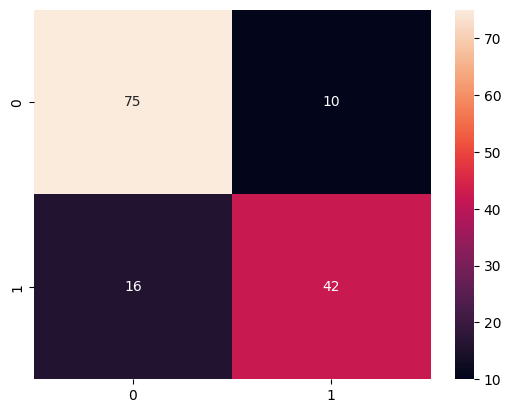

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sn
p = sn.heatmap(cm,annot=True,fmt='d')

In [16]:
model.predict([[3,	22.0,	7.2500,	1]])

C:\Users\saiab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)